/var/folders/ht/_t09b17d0p11tcppmbhzsry40000gn/T/ipykernel_93232/2761141985.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


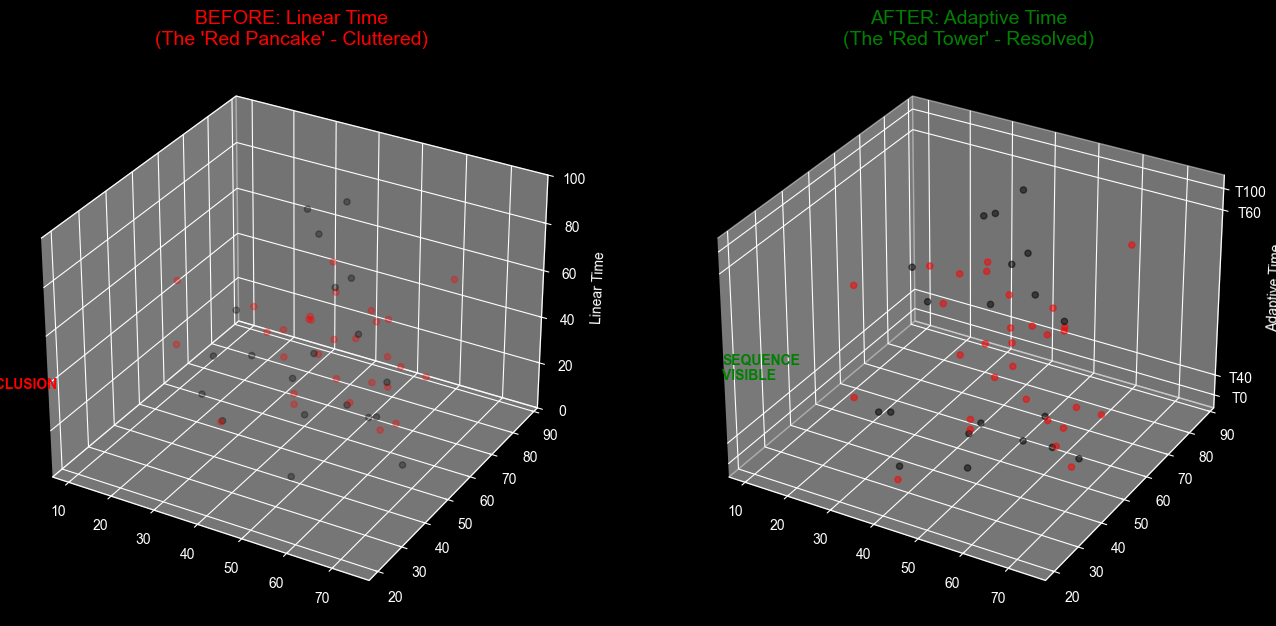

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def generate_colored_point_comparison():
    # 1. Setup Data: 500 Random Events
    np.random.seed(42)
    n_points = 50

    # Generate Times: 80% in the burst (40-60), 20% in lulls
    t_burst = np.random.uniform(40, 60, int(n_points * 0.6))
    t_lull1 = np.random.uniform(0, 40, int(n_points * 0.2))
    t_lull2 = np.random.uniform(60, 100, int(n_points * 0.2))
    t_linear = np.concatenate([t_lull1, t_burst, t_lull2])

    # Generate Space (X, Y): Random clusters
    x = np.random.normal(50, 15, n_points)
    y = np.random.normal(50, 15, n_points)

    # 2. Define the Adaptive "Warp"
    def warp_time(t):
        t_new = np.zeros_like(t)
        for idx, val in enumerate(t):
            if val < 40:
                t_new[idx] = val * 0.25 # Squash Lull
            elif val >= 40 and val <= 60:
                t_new[idx] = 10 + (val - 40) * 4 # Expand Burst
            else:
                t_new[idx] = 90 + (val - 60) * 0.25 # Squash Lull
        return t_new

    t_adaptive = warp_time(t_linear)

    # 3. Create Color Array (Red for Burst, Black for Lull)
    # This ensures the exact same points are colored in both plots
    colors = ['red' if (t >= 40 and t <= 60) else 'black' for t in t_linear]

    # 4. Plotting
    fig = plt.figure(figsize=(16, 8))

    # --- PLOT 1: LINEAR (The Red Pancake) ---
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title("BEFORE: Linear Time\n(The 'Red Pancake' - Cluttered)", fontsize=14, color='red')

    # Plot points with color coding
    ax1.scatter(x, y, t_linear, c=colors, alpha=0.3, s=20)

    # Visual Guide
    ax1.text(0, 0, 50, "OCCLUSION", color='red', fontweight='bold')
    ax1.set_zlim(0, 100)
    ax1.set_zlabel('Linear Time')

    # --- PLOT 2: ADAPTIVE (The Red Tower) ---
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_title("AFTER: Adaptive Time\n(The 'Red Tower' - Resolved)", fontsize=14, color='green')

    # Plot warped points with SAME colors
    ax2.scatter(x, y, t_adaptive, c=colors, alpha=0.5, s=20)

    # Visual Guides
    ax2.text(10, 10, 50, "SEQUENCE\nVISIBLE", color='green', fontweight='bold')

    # Custom Ticks
    ax2.set_zticks([0, 10, 90, 100])
    ax2.set_zticklabels(['T0', 'T40', 'T60', 'T100'])
    ax2.set_zlabel('Adaptive Time')

    plt.tight_layout()
    plt.show()

generate_colored_point_comparison()

/var/folders/ht/_t09b17d0p11tcppmbhzsry40000gn/T/ipykernel_93232/113330332.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


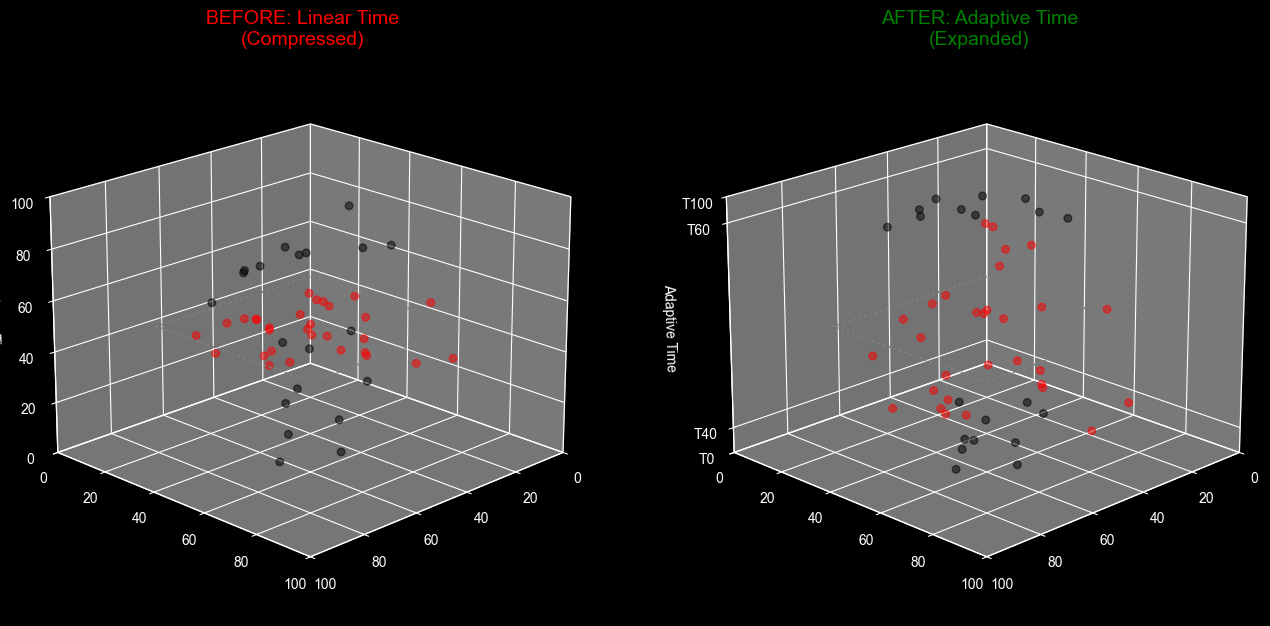

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def generate_colored_point_comparison_fixed():
    # 1. Setup Data: 50 Random Events
    np.random.seed(42)
    n_points = 50

    # Generate Times
    t_burst = np.random.uniform(40, 60, int(n_points * 0.6))
    t_lull1 = np.random.uniform(0, 40, int(n_points * 0.2))
    t_lull2 = np.random.uniform(60, 100, int(n_points * 0.2))
    t_linear = np.concatenate([t_lull1, t_burst, t_lull2])

    # Generate Space (X, Y)
    x = np.random.normal(50, 15, n_points)
    y = np.random.normal(50, 15, n_points)

    # 2. Define the Adaptive "Warp"
    def warp_time(t):
        t_new = np.zeros_like(t)
        for idx, val in enumerate(t):
            if val < 40:
                t_new[idx] = val * 0.25
            elif val >= 40 and val <= 60:
                t_new[idx] = 10 + (val - 40) * 4
            else:
                t_new[idx] = 90 + (val - 60) * 0.25
        return t_new

    t_adaptive = warp_time(t_linear)
    colors = ['red' if (t >= 40 and t <= 60) else 'black' for t in t_linear]

    # 3. Plotting with LOCKED VIEW
    fig = plt.figure(figsize=(16, 8))

    # --- PLOT 1: LINEAR ---
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title("BEFORE: Linear Time\n(Compressed)", fontsize=14, color='red')
    ax1.scatter(x, y, t_linear, c=colors, alpha=0.5, s=30) # Increased alpha/size for visibility

    # LOCK THE LIMITS
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 100)
    ax1.set_zlim(0, 100)

    # LOCK THE CAMERA
    ax1.view_init(elev=20, azim=45)

    ax1.set_zlabel('Linear Time')

    # --- PLOT 2: ADAPTIVE ---
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_title("AFTER: Adaptive Time\n(Expanded)", fontsize=14, color='green')
    ax2.scatter(x, y, t_adaptive, c=colors, alpha=0.5, s=30)

    # LOCK THE LIMITS
    ax2.set_xlim(0, 100)
    ax2.set_ylim(0, 100)
    ax2.set_zlim(0, 100)

    # LOCK THE CAMERA (Must match ax1)
    ax2.view_init(elev=20, azim=45)

    # Custom Ticks
    ax2.set_zticks([0, 10, 90, 100])
    ax2.set_zticklabels(['T0', 'T40', 'T60', 'T100'])
    ax2.set_zlabel('Adaptive Time')

    # Visual Guide Lines (To prove X/Y is stable)
    # Let's draw a box around the burst area in both to show they are the same width
    ax1.plot([20, 80, 80, 20, 20], [20, 20, 80, 80, 20], [50, 50, 50, 50, 50], color='gray', linestyle=':')
    ax2.plot([20, 80, 80, 20, 20], [20, 20, 80, 80, 20], [50, 50, 50, 50, 50], color='gray', linestyle=':')

    plt.tight_layout()
    plt.show()

generate_colored_point_comparison_fixed()

/var/folders/ht/_t09b17d0p11tcppmbhzsry40000gn/T/ipykernel_93232/159120114.py:79: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


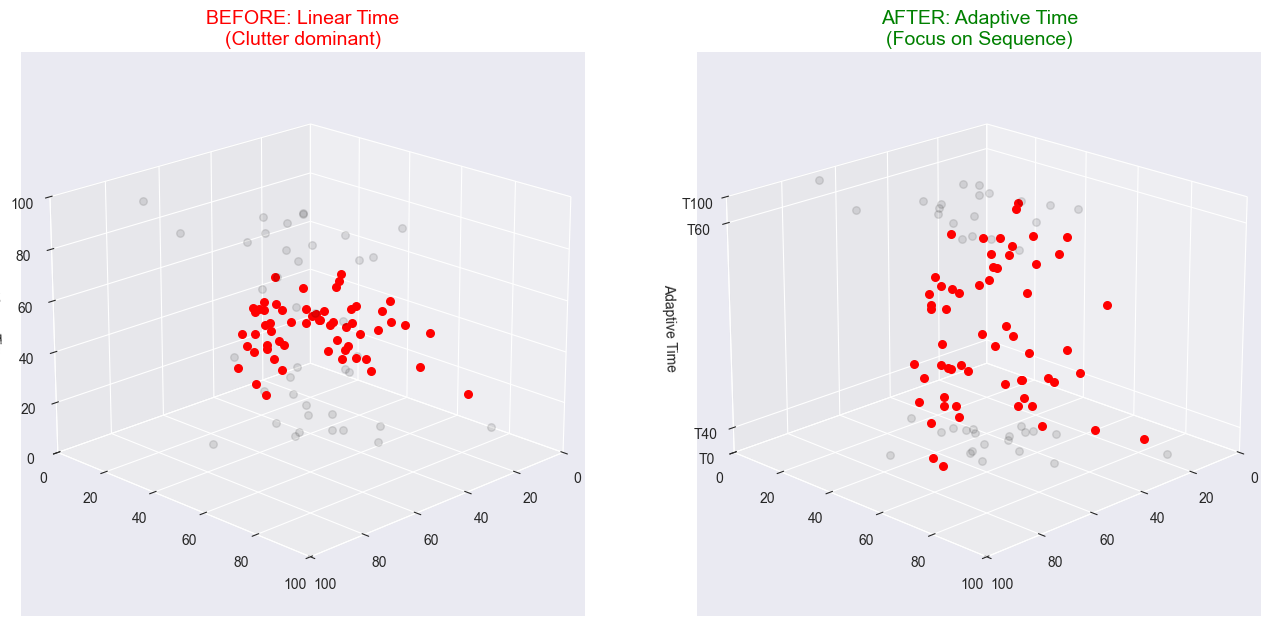

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def generate_faded_context_comparison():
    # 1. Setup Data: 50 Random Events
    np.random.seed(42)
    n_points = 100

    # Generate Times
    t_burst = np.random.uniform(40, 60, int(n_points * 0.6))
    t_lull1 = np.random.uniform(0, 40, int(n_points * 0.2))
    t_lull2 = np.random.uniform(60, 100, int(n_points * 0.2))
    t_linear = np.concatenate([t_lull1, t_burst, t_lull2])

    # Generate Space (X, Y)
    x = np.random.normal(50, 15, n_points)
    y = np.random.normal(50, 15, n_points)

    # 2. Define the Adaptive "Warp"
    def warp_time(t):
        t_new = np.zeros_like(t)
        for idx, val in enumerate(t):
            if val < 40:
                t_new[idx] = val * 0.25
            elif val >= 40 and val <= 60:
                t_new[idx] = 10 + (val - 40) * 4
            else:
                t_new[idx] = 90 + (val - 60) * 0.25
        return t_new

    t_adaptive = warp_time(t_linear)

    # 3. Define Colors AND Alphas (Transparency)
    # Burst = Red + Solid (Alpha 1.0)
    # Lull = Black + Faded (Alpha 0.1)
    colors = []
    alphas = []

    for t in t_linear:
        if t >= 40 and t <= 60:
            colors.append('red')
            alphas.append(1.0)  # Solid
        else:
            colors.append('black')
            alphas.append(0.1)  # Very Faded

    # 4. Plotting
    fig = plt.figure(figsize=(16, 8))

    # --- PLOT 1: LINEAR ---
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title("BEFORE: Linear Time\n(Clutter dominant)", fontsize=14, color='red')

    # Matplotlib scatter doesn't accept a list of alphas easily, so we loop or use RGBA
    # A simple way is to use RGBA colors where A is alpha.
    # We will loop for clarity in this specific viz script to ensure strict alpha control
    for i in range(n_points):
        ax1.scatter(x[i], y[i], t_linear[i], c=colors[i], alpha=alphas[i], s=30)

    ax1.set_xlim(0, 100); ax1.set_ylim(0, 100); ax1.set_zlim(0, 100)
    ax1.view_init(elev=20, azim=45)
    ax1.set_zlabel('Linear Time')

    # --- PLOT 2: ADAPTIVE ---
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_title("AFTER: Adaptive Time\n(Focus on Sequence)", fontsize=14, color='green')

    for i in range(n_points):
        ax2.scatter(x[i], y[i], t_adaptive[i], c=colors[i], alpha=alphas[i], s=30)

    ax2.set_xlim(0, 100); ax2.set_ylim(0, 100); ax2.set_zlim(0, 100)
    ax2.view_init(elev=20, azim=45)

    # Custom Ticks
    ax2.set_zticks([0, 10, 90, 100])
    ax2.set_zticklabels(['T0', 'T40', 'T60', 'T100'])
    ax2.set_zlabel('Adaptive Time')

    plt.tight_layout()
    plt.show()

generate_faded_context_comparison()

/var/folders/ht/_t09b17d0p11tcppmbhzsry40000gn/T/ipykernel_93232/3747347584.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


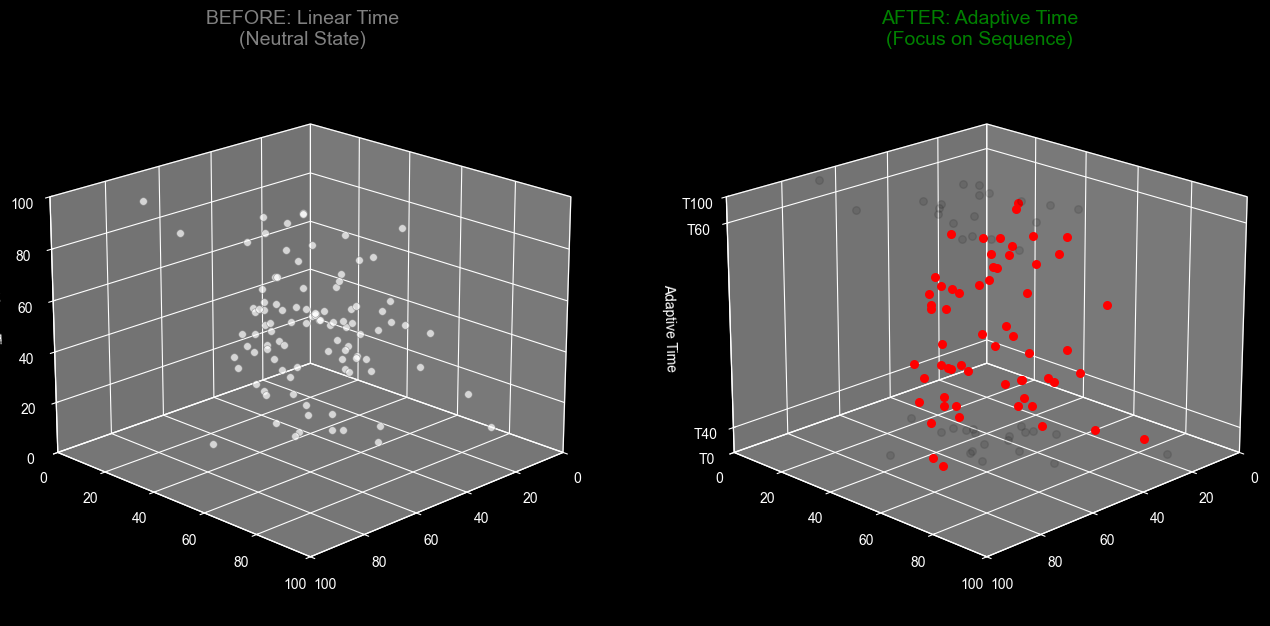

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def generate_faded_context_comparison():
    # 1. Setup Data: 50 Random Events
    np.random.seed(42)
    n_points = 100

    # Generate Times
    t_burst = np.random.uniform(40, 60, int(n_points * 0.6))
    t_lull1 = np.random.uniform(0, 40, int(n_points * 0.2))
    t_lull2 = np.random.uniform(60, 100, int(n_points * 0.2))
    t_linear = np.concatenate([t_lull1, t_burst, t_lull2])

    # Generate Space (X, Y)
    x = np.random.normal(50, 15, n_points)
    y = np.random.normal(50, 15, n_points)

    # 2. Define the Adaptive "Warp"
    def warp_time(t):
        t_new = np.zeros_like(t)
        for idx, val in enumerate(t):
            if val < 40:
                t_new[idx] = val * 0.25
            elif val >= 40 and val <= 60:
                t_new[idx] = 10 + (val - 40) * 4
            else:
                t_new[idx] = 90 + (val - 60) * 0.25
        return t_new

    t_adaptive = warp_time(t_linear)

    # 3. Define Colors AND Alphas for ADAPTIVE plot only
    colors_adaptive = []
    alphas_adaptive = []

    for t in t_linear:
        if t >= 40 and t <= 60:
            colors_adaptive.append('red')
            alphas_adaptive.append(1.0)  # Solid
        else:
            colors_adaptive.append('black')
            alphas_adaptive.append(0.1)  # Very Faded

    # 4. Plotting
    fig = plt.figure(figsize=(16, 8))

    # --- PLOT 1: LINEAR (All White - Neutral State) ---
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_title("BEFORE: Linear Time\n(Neutral State)", fontsize=14, color='gray')

    # All points in white with consistent alpha
    for i in range(n_points):
        ax1.scatter(x[i], y[i], t_linear[i], c='white', alpha=0.7, s=30, edgecolors='gray', linewidths=0.5)

    ax1.set_xlim(0, 100); ax1.set_ylim(0, 100); ax1.set_zlim(0, 100)
    ax1.view_init(elev=20, azim=45)
    ax1.set_zlabel('Linear Time')

    # --- PLOT 2: ADAPTIVE (Color-coded) ---
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.set_title("AFTER: Adaptive Time\n(Focus on Sequence)", fontsize=14, color='green')

    for i in range(n_points):
        ax2.scatter(x[i], y[i], t_adaptive[i], c=colors_adaptive[i], alpha=alphas_adaptive[i], s=30)

    ax2.set_xlim(0, 100); ax2.set_ylim(0, 100); ax2.set_zlim(0, 100)
    ax2.view_init(elev=20, azim=45)

    # Custom Ticks
    ax2.set_zticks([0, 10, 90, 100])
    ax2.set_zticklabels(['T0', 'T40', 'T60', 'T100'])
    ax2.set_zlabel('Adaptive Time')

    plt.tight_layout()
    plt.show()

generate_faded_context_comparison()
